In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Gk=0.36;Gna=1.2;Gl=0.003; C=0.01;
Ek=(-72.14) ; Ena=55.17 ; El=-49.42;
isPoisson = False ; rate = 0.32
domain = 120 ; res = 0.01
tspan = np.arange(0,domain,res)

In [0]:


def f(y,t):
    dydt = [0,0,0,0]
    V = y[0]
    
    an = 0.01*(V+50)/(1-np.exp(-(50+V)/10))
    bn = 0.125*np.exp(-(V+60)/80)
    
    am= 0.1*(35+V)/(1-np.exp(-(35+V)/10))
    bm = 4*np.exp(-0.0556*(60+V))
    
    ah = 0.07*np.exp(-0.05*(V+60))
    bh = 1/(1+np.exp(-0.1*(V+30)))
    
    dydt[0]=(1/C)*(I(t)-Gna*(y[2]**3)*y[3]*(y[0]-Ena)-Gk*(y[1]**4)*(y[0 ]-Ek) -Gl*(y[0]-El));
    dydt[1]= an - (an+bn)*y[1]
    dydt[2]= am - (am+bm)*y[2]
    dydt[3]= ah - (ah+bh)*y[3]
    
    return dydt

def frequency (voltage,start,res):
    count = 0
    period = 0
    for i in range(start,len(voltage)):
        period += 1
        if voltage[i]>-40 and voltage[i]>voltage[i-1]:
            count += 1
    period *= res
    return count/period


In [0]:
A = np.arange(0,2,0.01)
omega = np.zeros(len(A))
for i in range(len(A)):
    A1 = A[i]
    
    def I(t):
       
        start1 = 70; stop1 = 120
        A2 = 0 ; start2=50 ; stop2 = 52
        pulse1 = A1*np.heaviside(t-start1,0)-A1*np.heaviside(t-stop1,0)
        pulse2 = A2*np.heaviside(t-start2,0)-A2*np.heaviside(t-stop2,0)
        return pulse1 + pulse2
    
    sol = odeint(f,[0,0,0,0],tspan)
    omega[i] = frequency(sol[:,0],1100,res)


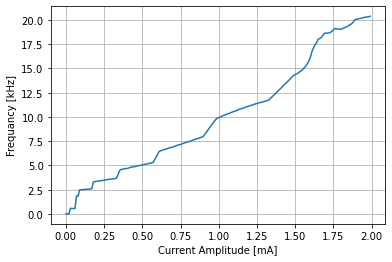

In [0]:
plt.grid()
plt.xlabel( "Current Amplitude [mA]" )
plt.ylabel( "Frequancy [kHz]" )
plt.plot(A,omega)
plt.savefig("Fire frequency")
